### Input-Output Analysis Workshop

**Date:**  
November 21, 2024

**Author**: meriem.mehri.24@ucl.ac.uk  

<img src="https://img.freepik.com/premium-photo/landscape-planet-earth-top-view_551707-49024.jpg" alt="Landscape Image" style="width:50%; height:auto;"/>


*For additional insights, refer to the slides on [Physical Risk & Input-Output Analysis](https://moodle.ucl.ac.uk/course/section.php?id=1060568) covered in **Week 7**.*

---

### <font color='green'> 1. Introduction

In this workshop, you will work with real-world data from the **EXIOBASE Input-Output Database**. By leveraging Input-Output (IO) analysis, you will explore the economic interconnections between industries and their environmental impacts. Through practical examples, you will learn how to calculate the **Leontief Inverse** and use it to assess how changes in final demand influence internal demand. Additionally, the workshop will guide you through visualizaing **demand impacts & shocks**, providing insight into how industries interact with ecological resources.

#### **Learning objectives**
- **Download and manage Input-Output (IO) data** from EXIOBASE.
- **Calculate the Leontief Inverse**, which is central to analyzing the relationships between economic sectors.
- **Understand the impact of changes in final demand** on production across various industries.
- **Develop practical skills** in handling real-world datasets, applying input-output models, and generating meaningful insights for operational risk and environmental sustainability.

#### Resources
- 🔗 [EXIOBASE](https://www.exiobase.eu/): A global, detailed *Multi-Regional Environmentally Extended Supply-Use Table (MR-SUT) and Input-Output Table (MR-IOT)* developed to estimate emissions and resource extractions by industry across numerous countries.
- 🔗 [Pymrio documentation](https://pymrio.readthedocs.io/en/latest/): Guide for using `pymrio`, a Python package for performing multi-regional input-output analysis.
- 🔗 [Pymrio GitHub repo](https://github.com/IndEcol/pymrio): Examples and code for implementing input-output analysis using `pymrio`.
- 🔗 [IOready GitHub repo](https://github.com/massimopizzol/IOready): A collection of ready-to-use tools for input-output analysis.

#### Data overview: EXIOBASE Input-Output database

The **EXIOBASE** database provides detailed **Input-Output Tables (MR-IOTs)**, thus, covering a wide range of industries and countries. It captures both **economic transactions** and **environmental data**, which include emissions and resource extraction by industry. The database is structured to represent inter-industry transactions, with rows corresponding to industries and columns representing the inputs they receive from others.

EXIOBASE is valuable for multi-regional analysis and allows users to study the environmental and economic impact of industries across regions. It provides a detailed breakdown of **monetary flows** between industries, as well as **environmental extensions** such as energy use and emissions data. Subsequently, these attributes make it ideal for sustainability assessments, economic impact studies, and  understanding global resource consumption patterns.

---

<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://www.exiobase.eu/images/basisafbeeldingen/ExioBase_Logo_600.png" width="400" style="margin-bottom: 20px;"/>
</div>

### <font color='green'> 2. Setting up your Jupyter environment

We’ll start by importing the data and begin performing IO analysis.

#### Installing necessary libraries & packages
We will use the following Python packages to perform the input-output analysis, handle the data, and create visualizations:
- `pymrio`: A Python library for loading and manipulating multi-regional input-output (IO) tables, including EXIOBASE data.
- `numpy`: For efficient numerical operations and matrix calculations, essential for computing the Leontief Inverse and other IO models.
- `pandas`: For managing and manipulating tabular data, such as Input-Output tables and extensions.
- `matplotlib`: For basic data visualization, including plotting the results of the IO analysis.
- `scipy`: For advanced linear algebra operations, such as matrix inversions, which may be more efficient for larger datasets.
- `seaborn`: For enhanced statistical data visualizations to better display relationships and trends.
- `networkx`: For visualizing complex networks, useful for illustrating inter-industry linkages.
- `plotly`: For creating interactive visualizations, allowing dynamic exploration of the data and results.

In [1]:
## Run the following code to install the required libraries:
!pip install pymrio numpy pandas matplotlib scipy seaborn networkx plotly

'''Do not edit this code snippet'''

'Do not edit this code snippet'

In [2]:
# Importing necessary libraries
import pymrio        # for Input-Output analysis and working with EXIOBASE data
import numpy as np   # for numerical and matrix operations
import pandas as pd  # for data management and manipulation
import matplotlib.pyplot as plt  # for visualizations
from scipy import linalg  # for advanced linear algebra operations
import seaborn as sns  # for statistical data visualizations
import networkx as nx  # for network graph visualizations
import plotly.express as px  # for interactive plots
import zipfile # module to work with zip archives
import os # to interact with the operating system

'''Do not edit this code snippet'''

'Do not edit this code snippet'

### <font color='green'> 3. Accessing & downloading the EXIOBASE data

To perform the Input-Output (IO) analysis, we'll first download the EXIOBASE data and load it into our notebook.

1. **Download the data**: You can download a sample Input-Output table from the **Zenodo repository** using the link below: [Zenodo repository](https://zenodo.org/records/5589597).

2. **Verify `pymrio` installation**: Ensure that `pymrio` is installed and up & running.
3. **Load the actual data to your notebook**: Once you've downloaded the `EXIOBASE` data, you can use `pymrio` to load and manipulate the dataset.


The `Pymrio Python package` simplifies parsing and analyzing the data, which makes it an ideal tool for working with extensions and sectoral datasets. If you encounter any issues while installing or using `pymrio`, refer to the documentation linked in the resources section above.

#### Step 1. Install `zenodo_get`

To download EXIOBASE data directly from Zenodo, install the `zenodo_get` package.

In [3]:
!pip install zenodo_get

'''Do not edit this code snippet'''

'Do not edit this code snippet'

#### Step 2. Download specific years of EXIOBASE data

Define the years of interest and download the corresponding `ixi` format EXIOBASE data files to your desired folder.

In [5]:
# Define the years you want to download (e.g., 1995, 2000, 2005, 2010, 2015, 2020)
years = [2015]

# Define the destination folder (sets the destination folder to the current Jupyter Notebook directory)
destination_folder = os.getcwd()  # Current working directory
# destination_folder = "insert_your_path/Downloads" # if you'd like to get the data directly from your downloads' folder

# Download EXIOBASE data for the specified years
# Loop through each year and download the corresponding EXIOBASE file in 'ixi' format
for year in years:
    print(f"Downloading EXIOBASE data for the year {year}...")
    !zenodo_get 10.5281/zenodo.5589597 -g "*{year}*ixi*" -o "{destination_folder}"
    
print("\nDownload complete. Files saved to the directory.")


Download complete. Files saved to the directory.


Title: EXIOBASE 3
Keywords: EXIOBASE, EE MRIO, Input Output, Sustainability, Indusrial Ecology, environmental-economic accounting, consumption based accounting
Publication date: 2021-10-21
DOI: 10.5281/zenodo.5589597
Total size: 767.6 MB

Link: https://zenodo.org/records/5589597/files/IOT_2015_ixi.zip   size: 767.6 MB

Checksum is correct. (ef087c85012840130938dcc040f4046a)
All files have been downloaded.


<img src="https://www.resourcewise.com/hs-fs/hubfs/trade-data-hero.jpg?width=1900&height=776&name=trade-data-hero.jpg" alt="Landscape Image" style="width:50%; height:auto;"/>


---
#### Step 3. Loading & analyzing the EXIOBASE data for a specific year

In this step, we will focus on the **2015 EXIOBASE dataset**, which provides comprehensive information on the flows of goods, services, and environmental impacts across different sectors and countries. The data is organized into several key components, and we will explore its structure by loading matrices and performing basic exploratory analysis.

#### Key components:

> **Sectors**: The rows and columns of the technical coefficients matrix represent inter-industry relationships, capturing how much input one sector requires from another to produce its output. EXIOBASE categorizes sectors in a nested structure, such as `i0X` for "age" and `i1X` for "winning," which indicate sub-sector classifications within broader industry groups.

> **Countries/regions**: EXIOBASE includes multi-regional data, with each sector represented for different countries. In the matrices, country codes (e.g., `AT` for Austria, `BE` for Belgium) indicate which nation the data pertains to. This allows for cross-country comparisons and the aggregation of data by region or global totals.

> **Products**: The dataset provides detailed data on specific products produced or consumed within each sector, enabling product-level analysis within the IO framework.

> **Environmental extensions**: While not directly visible in the technical matrices we are loading, environmental extensions detail industry-specific environmental impacts, such as energy consumption, emissions, and resource extraction. These are typically available in satellite tables, which provide additional layers of ecological and resource usage data.


**Note**: Extensions in `EXIOBASE`  link the sectors to environmental impacts - e.g., greenhouse gas emissions, water use, and material flows, enabling researchers to evaluate sustainability and resource efficiency. Regular updates ensure alignment with evolving research needs.

In [6]:
# Function to preview the first few lines of a text file inside the zip file
def preview_zip_file(zip_path, filename, num_lines=10):
    with zipfile.ZipFile(zip_path, 'r') as z:
        with z.open(filename) as file:
            # Read and print the first few lines
            for i in range(num_lines):
                print(file.readline().decode('utf-8').strip())

# Define the path to your zip file (example assumes files are in the Jupyter notebook directory)
zip_file_2015 = os.path.join(destination_folder, "IOT_2015_ixi.zip")  # Adjust if necessary

# Preview the content of the 'A.txt' file to understand its structure
preview_zip_file(zip_file_2015, "IOT_2015_ixi/A.txt", num_lines=10)

'''Do not edit this code snippet'''

region		AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	AT	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BE	BG	BG	BG	BG	BG

'Do not edit this code snippet'

In [7]:
# Function to load a sample of the matrix data from the file for a more structured view
def load_matrix_sample(zip_path, filename, num_rows=5, num_columns=5):
    with zipfile.ZipFile(zip_path, 'r') as z:
        with z.open(filename) as file:
            # Load the data into a DataFrame, assuming tab-separated values
            matrix = pd.read_csv(file, sep='\t', header=None)
            # Display the shape of the matrix for context
            print("\nMatrix Shape:", matrix.shape)
            # Return a sample of the matrix (first few rows and columns)
            return matrix.iloc[:num_rows, :num_columns]

# Display a structured sample from the matrix
print("\nStructured preview of Matrix 2015 (A):")
matrix_sample = load_matrix_sample(zip_file_2015, 'IOT_2015_ixi/A.txt')
print(matrix_sample)

'''Do not edit this code snippet'''


Structured preview of Matrix 2015 (A):


C:\Users\mehri\AppData\Local\Temp\ipykernel_29880\1632122693.py:6: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,


Matrix Shape: (7990, 7989)
        0                          1                          2  \
0  region                        NaN                         AT   
1  sector                        NaN  Cultivation of paddy rice   
2  region                     sector                        NaN   
3      AT  Cultivation of paddy rice                          0   
4      AT       Cultivation of wheat                          0   

                      3                                 4  
0                    AT                                AT  
1  Cultivation of wheat  Cultivation of cereal grains nec  
2                   NaN                               NaN  
3                     0                                 0  
4       0.0329723510498                                 0  


'Do not edit this code snippet'

In [15]:
# Load the full matrix data from the zip file for detailed analysis
def load_matrix_from_zip(zip_path, filename, headers=None):
    with zipfile.ZipFile(zip_path, 'r') as z:
        with z.open(filename) as file:
            # Load the data into a DataFrame, assuming tab-separated values
            matrix = pd.read_csv(file, sep='\t', header=None if headers is None else 0, names=headers)
            return matrix

# Specify the path to the zip file and matrix file
zip_file_2015 = os.path.join(os.getcwd(), "IOT_2015_ixi.zip")  # Adjust this as needed
headers = ["region", "sector"] + list(range(7987))  # Example headers; adjust based on the actual data

# Load Matrix A with custom headers
matrix_2015_A = load_matrix_from_zip(zip_file_2015, 'IOT_2015_ixi/A.txt', headers=headers)

'''Do not edit this code snippet'''

C:\Users\mehri\AppData\Local\Temp\ipykernel_29880\1670709229.py:6: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

'Do not edit this code snippet'

In [16]:
# Display basic information for matrix A
print("Matrix A (2015) Overview:")
print(matrix_2015_A.info())

# Check for missing values
print("\nMissing Values in Matrix A (2015):")
print(matrix_2015_A.isnull().sum())

# Verify column names
print("\nColumn Names in Matrix A:")
print(matrix_2015_A.columns)

# Check for unique values in 'region' and 'sector'
if 'region' in matrix_2015_A.columns and 'sector' in matrix_2015_A.columns:
    print("\nUnique Values in 'region' Column:")
    print(matrix_2015_A['region'].unique())
    print("\nUnique Values in 'sector' Column:")
    print(matrix_2015_A['sector'].unique())
else:
    print("\n'region' or 'sector' columns are missing in the loaded matrix. Verify the headers.")

Matrix A (2015) Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989 entries, 0 to 7988
Columns: 7989 entries, region to 7986
dtypes: object(7989)
memory usage: 486.9+ MB
None

Missing Values in Matrix A (2015):
region    0
sector    1
0         1
1         1
2         1
         ..
7982      1
7983      1
7984      1
7985      1
7986      1
Length: 7989, dtype: int64

Column Names in Matrix A:
Index(['region', 'sector',        0,        1,        2,        3,        4,
              5,        6,        7,
       ...
           7977,     7978,     7979,     7980,     7981,     7982,     7983,
           7984,     7985,     7986],
      dtype='object', length=7989)

Unique Values in 'region' Column:
['sector' 'region' 'AT' 'BE' 'BG' 'CY' 'CZ' 'DE' 'DK' 'EE' 'ES' 'FI' 'FR'
 'GR' 'HR' 'HU' 'IE' 'IT' 'LT' 'LU' 'LV' 'MT' 'NL' 'PL' 'PT' 'RO' 'SE'
 'SI' 'SK' 'GB' 'US' 'JP' 'CN' 'CA' 'KR' 'BR' 'IN' 'MX' 'RU' 'AU' 'CH'
 'TR' 'TW' 'NO' 'ID' 'ZA' 'WA' 'WL' 'WE' 'WF' 'WM']

Unique Valu

In [17]:
print("\nMatrix A (2015) Summary Statistics:")
matrix_2015_A.describe()


Matrix A (2015) Summary Statistics:


,region,sector,0,1,2,3,4,5,6,7,...,7977,7978,7979,7980,7981,7982,7983,7984,7985,7986
count,7989,7988,7988,7988.0,7988.0,7988.0,7988.0,7988.0,7988.0,7988.0,...,7988.0,7988.0,7988.0,7988.0,7988.0,7988.0,7988.0,7988.0,7988.0,7988
unique,51,164,3,5929.0,5931.0,5951.0,5894.0,5887.0,5373.0,5958.0,...,6216.0,6193.0,6217.0,6042.0,6095.0,6266.0,6304.0,6294.0,6175.0,3
top,RO,Other non-ferrous metal production,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
freq,163,49,7861,2037.0,2035.0,2015.0,2072.0,2078.0,2591.0,2009.0,...,1755.0,1778.0,1754.0,1923.0,1871.0,1705.0,1667.0,1677.0,1796.0,7861


#### Step 4. Loading key matrices & vectors

We then proceed to load the key matrices from the **2015** dataset, including:

- `A (technical coefficients matrix)`: Shows inter-industry relationships, capturing how much input each sector requires from others to produce its output. This component is crucial for understanding and computing the *Leontief Inverse*, which estimates how changes in demand for final products affect the overall production system.
  
- `Y (final demand matrix)`: Contains data on the final consumption of goods and services by different end users.

- `Z (intermediate demand matrix)`: Represents the flow of goods and services between sectors, capturing the intermediate consumption required to produce goods within each sector.

- `x (output vector)`: Contains the total output for each sector, serving as a key indicator of the production level across sectors and countries.

In [18]:
# Function to load a matrix from a text file within a zip archive
# By working directly from the zip file, we efficiently access these matrices for further analysis
def load_matrix_from_zip(zip_path, filename):
    """
    Load a matrix from a text file inside a zip archive.

    Parameters:
    zip_path (str): The path to the zip file containing the EXIOBASE data.
    filename (str): The name of the text file to extract and read from the zip.

    Returns:
    pd.DataFrame: The loaded matrix as a pandas DataFrame.
    """
    with zipfile.ZipFile(zip_path, 'r') as z:
        with z.open(filename) as file:
            # Load the file content as a pandas DataFrame
            matrix = pd.read_csv(file, sep='\t', header=None)
    return matrix

'''Do not edit this code snippet'''

'Do not edit this code snippet'

In [19]:
# Define the path to the EXIOBASE zip file for 2015
zip_file_2015 = os.path.join(destination_folder, "IOT_2015_ixi.zip")  # Adjust if necessary

In [20]:
# Load the key matrices for 2015
# These matrices form the basis for calculating production relationships, environmental impacts, and economic activities.
matrix_2015_A = load_matrix_from_zip(zip_file_2015, 'IOT_2015_ixi/A.txt')  # Technical Coefficients Matrix (A)
matrix_2015_Y = load_matrix_from_zip(zip_file_2015, 'IOT_2015_ixi/Y.txt')  # Final Demand Matrix (Y)
matrix_2015_Z = load_matrix_from_zip(zip_file_2015, 'IOT_2015_ixi/Z.txt')  # Intermediate Demand Matrix (Z)
matrix_2015_x = load_matrix_from_zip(zip_file_2015, 'IOT_2015_ixi/x.txt')  # Output Vector (x)

C:\Users\mehri\AppData\Local\Temp\ipykernel_29880\3667513347.py:17: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

In [21]:
# Display basic information for each matrix to understand its structure and content
print("Matrix Y (Final Demand Matrix):")
print(matrix_2015_Y.info())
print(matrix_2015_Y.head(), "\n")

Matrix Y (Final Demand Matrix):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7990 entries, 0 to 7989
Columns: 345 entries, 0 to 344
dtypes: object(345)
memory usage: 21.0+ MB
None
        0                          1    \
0    region                        NaN   
1  category                        NaN   
2    region                     sector   
3        AT  Cultivation of paddy rice   
4        AT       Cultivation of wheat   

                                           2    \
0                                           AT   
1  Final consumption expenditure by households   
2                                          NaN   
3                                            0   
4                            0.000341222288891   

                                                 3    \
0                                                 AT   
1  Final consumption expenditure by non-profit or...   
2                                                NaN   
3                                    

In [22]:
print("Matrix Z (Intermediate Demand Matrix):")
print(matrix_2015_Z.info())
print(matrix_2015_Z.head(), "\n")

Matrix Z (Intermediate Demand Matrix):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7990 entries, 0 to 7989
Columns: 7989 entries, 0 to 7988
dtypes: object(7989)
memory usage: 487.0+ MB
None
     0                          1                          2     \
0  region                        NaN                         AT   
1  sector                        NaN  Cultivation of paddy rice   
2  region                     sector                        NaN   
3      AT  Cultivation of paddy rice                          0   
4      AT       Cultivation of wheat                          0   

                   3                                 4     \
0                    AT                                AT   
1  Cultivation of wheat  Cultivation of cereal grains nec   
2                   NaN                               NaN   
3                     0                                 0   
4          10.925288057                                 0   

                                  

In [23]:
print("Vector x (Output Vector):")
print(matrix_2015_x.info())
print(matrix_2015_x.head(), "\n")

Vector x (Output Vector):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 0 to 7987
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7988 non-null   object
 1   1       7988 non-null   object
 2   2       7988 non-null   object
dtypes: object(3)
memory usage: 187.3+ KB
None
        0                                       1              2
0  region                                  sector         indout
1      AT               Cultivation of paddy rice              0
2      AT                    Cultivation of wheat  331.346953105
3      AT        Cultivation of cereal grains nec  760.600254513
4      AT  Cultivation of vegetables, fruit, nuts  1416.37567937 



In [24]:
# Display summary statistics for each matrix to further analyze their distributions and data integrity
print("\nSummary Statistics for Matrix Y (Final Demand Matrix):")
matrix_2015_Y.describe()


Summary Statistics for Matrix Y (Final Demand Matrix):


,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
count,7990,7988,7989.0,7989.0,7989.0,7989.0,7989.0,7989,7989,7989.0,...,7989.0,7989,7989,7989.0,7989.0,7989.0,7989.0,7989,7989,7989
unique,51,164,5900.0,2155.0,5385.0,5551.0,5772.0,4,4,6008.0,...,3791.0,131,4,6288.0,6212.0,6182.0,5738.0,4,4,4
top,RO,Other non-ferrous metal production,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0
freq,163,49,1688.0,4357.0,2065.0,1965.0,1810.0,5942,5942,1583.0,...,3180.0,5815,5942,1343.0,1407.0,1428.0,1813.0,5942,5942,5942


In [25]:
print("\nSummary Statistics for Matrix Z (Intermediate Demand Matrix):")
matrix_2015_Z.describe()


Summary Statistics for Matrix Z (Intermediate Demand Matrix):


,0,1,2,3,4,5,6,7,8,9,...,7979,7980,7981,7982,7983,7984,7985,7986,7987,7988
count,7990,7988,7989,7989.0,7989.0,7989.0,7989.0,7989.0,7989.0,7989.0,...,7989.0,7989.0,7989.0,7989.0,7989.0,7989.0,7989.0,7989.0,7989.0,7989
unique,51,164,4,5930.0,5932.0,5952.0,5895.0,5888.0,5374.0,5959.0,...,6217.0,6194.0,6218.0,6043.0,6096.0,6267.0,6305.0,6295.0,6176.0,4
top,RO,Other non-ferrous metal production,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
freq,163,49,7862,2037.0,2035.0,2015.0,2072.0,2078.0,2591.0,2009.0,...,1755.0,1778.0,1754.0,1923.0,1871.0,1705.0,1667.0,1677.0,1796.0,7862


In [26]:
print("\nSummary Statistics for Vector x (Output Vector):")
matrix_2015_x.describe()


Summary Statistics for Vector x (Output Vector):


,0,1,2
count,7988,7988,7988
unique,50,164,6821
top,SE,Other non-ferrous metal production,0
freq,163,49,1071


**Key observations**
- `Matrix Y` represents the **final demand matrix**: reflects the final consumption demand across sectors by various economic agents, such as households, governments, and non-profits. The matrix has 345 columns (final demand categories) and 7990 rows (sector-region combinations). Summary statistics reveal that "Other non-ferrous metal production" is a leading sector in terms of demand frequency, indicating its critical role in consumption across regions.


- `Matrix Z` is the **intermediate demand matrix**: captures the intermediate demand between sectors, where outputs from one sector serve as inputs for others. It has 7989 columns and rows, representing a square matrix where each entry quantifies the flow of goods or services from one sector to another. The summary statistics highlight that sectors like "Non-ferrous metal production" dominate in terms of input-output activity, reflecting their importance in supply chain linkages.

- `Vector x` denotes the **output vector**: represents the total output of each sector, combining both intermediate & final demands. It has 7988 entries, where each row corresponds to the aggregate production of a sector-region combination. The summary statistics show substantial variation in output levels, with sectors like "Cultivation of wheat" - exhibiting high output values to underline their critical contributions to the economy.

#### <font color='brown'> Step 5. Diving deeper into the UK's IO matrix

To conduct a more targeted analysis, we will focus on the Input-Output matrix of the **UK** by aggregating data from all other countries into a single **Rest of the World (RoW)** category. The approach we use allows us to examine the UK's production and consumption patterns in detail while consolidating international relationships into a single entity.

**Note**: If desired, it is possible to retain the full IO table without collapsing other countries, which enables flexibility in exploring different contexts or focusing on other individual countries/international dynamics.

In [32]:
# Define the UK identifier
uk_identifier = "UK"  # Replace "UK" with the actual identifier used for the United Kingdom in your data

# Define the aggregation function
def aggregate_to_uk_row(matrix, country_column_name, uk_identifier):
    """
    Aggregates matrix data to focus on the UK while collapsing all other countries into RoW.

    Parameters:
    - matrix (pd.DataFrame): The data matrix.
    - country_column_name (str): Column name for country codes.
    - uk_identifier (str): Identifier for the UK (default is 'UK').

    Returns:
    - pd.DataFrame: Aggregated matrix with UK and RoW.
    """
    # Separate data for the UK
    uk_data = matrix[matrix[country_column_name] == uk_identifier]
    
    # Collapse all other countries into RoW
    row_data = matrix[matrix[country_column_name] != uk_identifier]
    row_data = row_data.sum(numeric_only=True).to_frame().T  # Aggregate as a single row
    row_data[country_column_name] = "RoW"  # Add "RoW" label

    # Combine UK and RoW into a single DataFrame
    aggregated_matrix = pd.concat([uk_data, row_data], ignore_index=True)
    return aggregated_matrix

# Apply the aggregation function to the loaded matrix
matrix_A_uk_row = aggregate_to_uk_row(matrix_2015_A, 'region', uk_identifier)

# Display aggregated data
uk_data = matrix_A_uk_row[matrix_A_uk_row['region'] == uk_identifier]
row_data = matrix_A_uk_row[matrix_A_uk_row['region'] != uk_identifier]
print("\nAggregated Data (UK and RoW):")
print(uk_data.head())  # Display data for the UK
print(row_data.head())  # Display data for the RoW

'''Do not edit this code snippet'''


Aggregated Data (UK and RoW):
Empty DataFrame
Columns: [region, sector, col_2, col_3, col_4, col_5, col_6, col_7, col_8, col_9, col_10, col_11, col_12, col_13, col_14, col_15, col_16, col_17, col_18, col_19, col_20, col_21, col_22, col_23, col_24, col_25, col_26, col_27, col_28, col_29, col_30, col_31, col_32, col_33, col_34, col_35, col_36, col_37, col_38, col_39, col_40, col_41, col_42, col_43, col_44, col_45, col_46, col_47, col_48, col_49, col_50, col_51, col_52, col_53, col_54, col_55, col_56, col_57, col_58, col_59, col_60, col_61, col_62, col_63, col_64, col_65, col_66, col_67, col_68, col_69, col_70, col_71, col_72, col_73, col_74, col_75, col_76, col_77, col_78, col_79, col_80, col_81, col_82, col_83, col_84, col_85, col_86, col_87, col_88, col_89, col_90, col_91, col_92, col_93, col_94, col_95, col_96, col_97, col_98, col_99, ...]
Index: []

[0 rows x 7989 columns]
  region sector col_2 col_3 col_4 col_5 col_6 col_7 col_8 col_9  ... col_7979  \
0    RoW    NaN   NaN   NaN   

The aggregation of data to focus specifically on the **UK** versus the **RoW** is a strategic way to simplify and analyze the data in a more focused manner. It allows for targeted insights into the UK's production and consumption patterns while consolidating international dynamics into a manageable format.                                                             

However, there are some considerations and potential challenges with this approach:

  - **Loss of granularity**: By collapsing all other countries into RoW, individual country-level details are lost - might obscure specific international dynamics that could be significant in certain analyses.
  - **Aggregation assumptions**: During aggregation, non-numeric data columns (such as textual labels) need to be carefully managed to avoid errors - requires well-structured preprocessing to ensure numeric-only operations where applicable.
  - **Custom adjustments**: The aggregation logic might need to be adjusted depending on the research question. For instance, grouping countries into regions (e.g., EU, Asia, Americas) instead of a single RoW category could provide intermediate granularity while still simplifying the dataset.

####  <font color='blue'> Optional 
#### Exploring carbon footprint data (2011)

- The **carbon footprint data** is available in the `EXIOBASE 3.7.1` dataset for the year 2011, within the `IOT_2011_ixi` sheet in the `hiot_results_PTM_v2` Excel file. This data enables an analysis of sectoral contributions to carbon emissions, providing insights into the environmental impact of production processes across different industries and countries. For more information, refer to [EXIOBASE Environmental Footprints](https://main.environmentalfootprints.org/exiobase3/).

In [33]:
# Function to load and analyze the carbon footprint data for 2011
def load_and_analyze_carbon_data(file_path):
    """
    Loads and performs basic exploratory data analysis on the carbon footprint data.
    
    Parameters:
    - file_path (str): Path to the Excel file containing carbon footprint data.
    
    Returns:
    - DataFrame: Loaded carbon footprint data.
    """
    try:
        # Load the data from the single sheet
        print("Loading carbon footprint data...")
        carbon_data = pd.read_excel(file_path)
        
        # Display basic information
        print("\nCarbon Footprint Data Overview:")
        print(carbon_data.info())
        print("\nFirst few rows of the dataset:")
        print(carbon_data.head())
        
        # Check for missing values
        print("\nMissing Values in Carbon Footprint Data:")
        print(carbon_data.isnull().sum())
        
        # Display summary statistics
        print("\nSummary Statistics for Carbon Footprint Data:")
        print(carbon_data.describe())
        
        return carbon_data

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please ensure the file path is correct.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Define the path to the Excel file containing carbon footprint data
carbon_footprint_file = 'C:/Users/mehri/Downloads/hiot_results.xlsx'  # Update this path if needed

# Load and analyze the carbon footprint data
carbon_data = load_and_analyze_carbon_data(carbon_footprint_file)

'''Do not edit this code snippet'''

Loading carbon footprint data...

Carbon Footprint Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CountryCode              7012 non-null   object 
 1   ProductTypeName_of_hiot  7012 non-null   object 
 2   product code 1           7012 non-null   object 
 3   product code 2           7012 non-null   object 
 4   OriginalPhysicalUnit     7012 non-null   object 
 5   GHGs-eq - tonnes         7012 non-null   float64
 6   PhysicalUnit             7012 non-null   object 
 7   CarbonFootprint          7012 non-null   float64
 8   unit                     7012 non-null   object 
 9   ProductTypeName          7012 non-null   object 
dtypes: float64(2), object(8)
memory usage: 547.9+ KB
None

First few rows of the dataset:
  CountryCode                 ProductTypeName_of_hiot product code 1  \
0          AU   

'Do not edit this code snippet'

C:\Users\mehri\ana\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


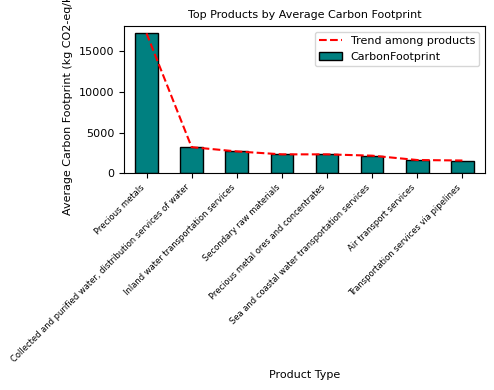

'Do not edit this code snippet'

In [35]:
# Group the data by ProductTypeName and calculate the mean CarbonFootprint for each product type
top_products = carbon_data.groupby('ProductTypeName')['CarbonFootprint'].mean().nlargest(8)

# Plotting
plt.figure(figsize=(5, 4))
top_products.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top Products by Average Carbon Footprint", fontsize=8)
plt.xlabel("Product Type", fontsize=8)
plt.ylabel("Average Carbon Footprint (kg CO2-eq/kg)", fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(fontsize=8)

x = np.arange(len(top_products))  # X-axis points (positions of the bars)
y = top_products.values  # Y-axis values (carbon footprint)
z = np.polyfit(x, y, 10)  # Fit a linear trend line
p = np.poly1d(z)  # Create polynomial from fit
plt.plot(x, p(x), color='red', linestyle='--', linewidth=1.5, label='Trend among products')  # Plot trend line

plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

'''Do not edit this code snippet'''

**Note:** The plot shown above is provided for illustrative purposes to help understand the expected outcome of the code being implemented - it solely serves as an example of how to visualize top products by average carbon footprint and trends among them. The actual results may vary based on the specific dataset/snippet and parameters selected.

### <font color='green'> 4. Calculating the Leontief Inverse

In this section, we calculate the ***Leontief inverse*** using the technical coefficients matrix $A$ to assess the direct and indirect impacts of changes in final demand across sectors. By visualizing the Leontief matrix, we observe interdependencies between industries, setting the foundation for further footprint analysis.

#### A little bit of theory on IO analysis & computation

Input-Output (IO) analysis, developed by Wassily Leontief, is a quantitative method for analyzing the interdependencies between sectors of an economy. It models the flow of goods and services, offering insights into how industries rely on one another for inputs and contribute to final demand.

As Blair and Miller (2009) explain, *"the Leontief model assumes fixed technical coefficients, allowing us to track how a unit increase in final demand for a product affects total output across all sectors"* (p. 46). This core concept captures the direct and indirect effects of changes in final demand across all sectors.


#### Key formula:

$$
L = (I - A)^{-1}
$$

Where:
- $( L $) is the **Leontief Inverse**,
- $(A $) is the matrix of technical coefficients,
- $( I $) is the identity matrix.


---

#### <font color='green'> Illustrative example

In the example from **section 10.3** of the book, using our matrix $( A $) from the previous section:

$$
A = \begin{bmatrix} 0.3 & 0.2 \\ 0.1 & 0.7 \end{bmatrix}
$$

the **Leontief inverse** \( L \) is calculated as:

$$
L = (I - A)^{-1} = \begin{bmatrix} 1.58 & 1.05 \\ 0.53 & 3.68 \end{bmatrix}
$$

This matrix $(L $) reveals the direct and indirect production required across both industries when there is a unit increase in final demand. For example, an increase in demand for **Industry A** will have ripple effects on both **Industry A** and **Industry B**, as illustrated by the values in $( L $).
    
---
*Source: [Blair and Miller, Chapter 10: Environmental Input-Output Analysis](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/A1048A88EE6213301A079B741A43A7C2/9780511626982c10_p446-498_CBO.pdf/environmental-input-output-analysis.pdf).*

#### Step 1: Set Up the technical coefficients matrix

We assume that the technical coefficients matrix 𝐴 has already been loaded from the previous section. The matrix 𝐴 represents the direct input-output relationships between industries.

In [36]:
# Display the shape of the technical coefficients matrix
print("Technical Coefficients Matrix (A) shape:", matrix_2015_A.shape)

# Display the shape of the final demand matrix
print("Final Demand Matrix (Y) shape:", matrix_2015_Y.shape)

# Optionally, display the first few rows of each matrix
print("\nFirst 5 rows of Technical Coefficients Matrix (A):")
print(matrix_2015_A.head())

print("\nFirst 5 rows of Final Demand Matrix (Y):")
print(matrix_2015_Y.head())

Technical Coefficients Matrix (A) shape: (7989, 7989)
Final Demand Matrix (Y) shape: (7990, 345)

First 5 rows of Technical Coefficients Matrix (A):
   region                            sector                      col_2  \
0  sector                               NaN  Cultivation of paddy rice   
1  region                            sector                        NaN   
2      AT         Cultivation of paddy rice                          0   
3      AT              Cultivation of wheat                          0   
4      AT  Cultivation of cereal grains nec                          0   

                  col_3                             col_4  \
0  Cultivation of wheat  Cultivation of cereal grains nec   
1                   NaN                               NaN   
2                     0                                 0   
3       0.0329723510498                                 0   
4                     0                   0.0146761842426   

                                    col

#### Step 2: Calculate the Leontief Inverse
Now that we have the technical coefficients matrix 𝐴, we can proceed to calculate the Leontief Inverse.

* We calculate the identity matrix 𝐼 of the same size as the technical coefficients matrix $𝐴$.
* The Leontief inverse 𝐿 is calculated using the formula, which captures the total output required by each sector to satisfy a unit increase in final demand for any given sector. **The result is a matrix that shows both direct and indirect effects across sectors.**

In [37]:
# Coerce non-numeric values to NaN and try converting everything to numeric
matrix_2015_A_numeric = matrix_2015_A.apply(pd.to_numeric, errors='coerce')

# Remove rows and columns that are still all NaN
matrix_2015_A_cleaned = matrix_2015_A_numeric.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Check the shape of the resulting matrix
print(f"Cleaned Matrix Shape (A): {matrix_2015_A_cleaned.shape}")

if matrix_2015_A_cleaned.shape[0] == matrix_2015_A_cleaned.shape[1]:
    # Step 4: Create the identity matrix I
    I = np.eye(matrix_2015_A_cleaned.shape[0])

    # Step 5: Calculate the Leontief inverse
    L = np.linalg.inv(I - matrix_2015_A_cleaned.values)

    # Step 6: Display the first few rows of the Leontief Inverse matrix
    print("Leontief Inverse (L):\n", L[:5, :5])
else:
    print("The matrix is still not square. Unable to proceed with the Leontief inverse.")
    
    
'''Do not edit this code snippet'''

Cleaned Matrix Shape (A): (7987, 7987)
Leontief Inverse (L):
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.03411390e+00 1.41155811e-05 1.76827722e-05
  9.83704449e-06]
 [0.00000000e+00 4.46991371e-05 1.01493173e+00 4.60624444e-05
  2.60254574e-05]
 [0.00000000e+00 1.16659039e-05 9.79257381e-06 1.07797913e+00
  6.73426245e-06]
 [0.00000000e+00 5.92821655e-07 5.02375206e-07 5.85440576e-07
  1.00393225e+00]]


'Do not edit this code snippet'

#### Step 3: Plotting & interpreting results
Here, we display a subset of the **Leontief inverse matrix** to provide insights into inter-sectoral dependencies. Each cell in the matrix represents the dependency strength between two sectors: the rows and columns correspond to the selected sectors, with normalized values indicating the level of interdependency.

The heatmap format highlights these relationships, where **diagonal** values reflect a sector’s internal dependency & **off-diagonal** values represent cross-sectoral dependencies.

By focusing on **10 sectors**, we simplify the visualization to capture key dependencies without overwhelming detail. The color intensity, represented by the color bar on the right, indicates the magnitude of dependency for quick comparisons of dependency strengths among sectors.

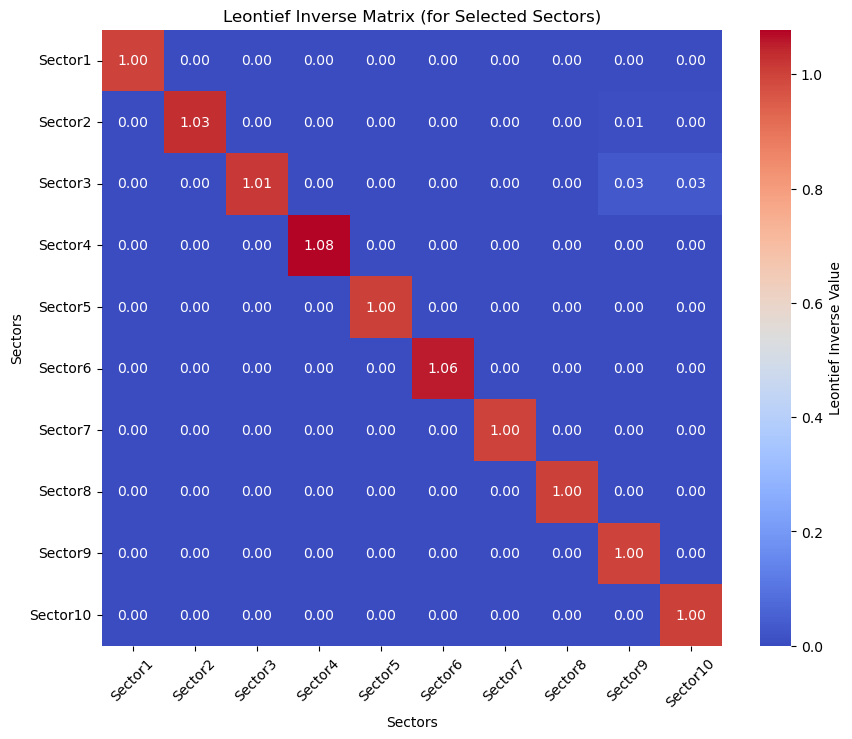

'Do not edit this code snippet'

In [38]:
# Limiting to a subset for clarity (e.g., top 10 sectors)
L_subset = L[:10, :10]  # Adjust indices as needed for your subset

# Plotting with annotations for easy interpretation
plt.figure(figsize=(10, 8))
sns.heatmap(L_subset, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Leontief Inverse Value'})
plt.title("Leontief Inverse Matrix (for Selected Sectors)")
plt.xlabel("Sectors")
plt.ylabel("Sectors")

# Set custom labels (adjust these names according to your actual sectors)
sector_labels = ['Sector1', 'Sector2', 'Sector3', 'Sector4', 'Sector5',
                 'Sector6', 'Sector7', 'Sector8', 'Sector9', 'Sector10']
plt.xticks(ticks=np.arange(10) + 0.5, labels=sector_labels, rotation=45)
plt.yticks(ticks=np.arange(10) + 0.5, labels=sector_labels, rotation=0)

plt.show()

'''Do not edit this code snippet'''

**Note:** There may be some inconsistencies in this plot due to the lack of pre-processing of the matrix data. However, the heatmap of sectors serves as a good starting point and is intended for illustrative purposes. You can use this as a foundation for further analysis and refinements.

### <font color='green'> 5. Applying the Leontief inverse for demand shock analysis

In this section, we will simulate a **demand shock** by adjusting the final demand vector. We will focus on specific sectors, **increasing demand** for `gas (sector 22)` and **decreasing demand** for `coal (sector 20)`, to simulate potential reactions to changes in energy policy or crises, such as a gas shortage. The analysis will illustrate how a shift in final demand impacts total output across sectors, using the ***Leontief Inverse*** matrix to capture these effects.


---
<img src="https://www.tandfonline.com/cms/asset/4d5108e4-0e6e-4d4e-9ad2-6c12bf051128/rael_a_2308590_f0002_oc.jpg" 
     alt="Landscape Image" 
     style="width:40%; height:auto; filter: grayscale(100%);"/>
     
     
> **Note**: These graphs are used for illustrative purposes - the image is sourced from the article: *A note on the dynamic effects of supply and demand shocks in the crude oil market* by Nguyen, H., & Österholm, P. (2024). For more information, see the full article in [Applied Economics Letters](https://www.tandfonline.com/doi/full/10.1080/13504851.2024.2308590#abstract) (Nguyen & Österholm, 2024, pp. 1–7). [DOI: 10.1080/13504851.2024.2308590]

#### Step 1: Simulating a demand shock `(↑ gas, ↓ coal)`

To simulate a demand shock, we adjust the `x` vector by modifying the demand for specific sectors - increasing demand for gas (sector 22) and decreasing demand for coal (sector 20). This setup allows us to explore how shifts in demand for these energy sources affect the economy, and we will also reverse the adjustments to simulate the opposite scenario.

1. **Sector indices**: We first identify the indices for the targeted sectors (gas and coal) within the dataset.
2. **Shock values**: We then determine the magnitude of the demand change for each sector, specifying an increase for gas and a decrease for coal.
3. **Demand shock vector**: We initialize a demand shock vector filled with zeros to match the dimensions of the final demand matrix. The shock values are then assigned to the relevant indices, effectively simulating a targeted increase or decrease in demand for each sector.

In [39]:
# Define sector indices for gas and coal
sector_gas = 22   # Index for the gas sector
sector_coal = 20  # Index for the coal sector

In [40]:
# Define shock values
gas_increase = 100   # Increase demand for gas by 100 units
coal_decrease = -50  # Decrease demand for coal by 50 units

In [41]:
# Initialize the demand shock vector (matching the Leontief matrix size)
demand_shock = np.zeros(matrix_2015_A_cleaned.shape[0])
demand_shock[sector_gas] = gas_increase
demand_shock[sector_coal] = coal_decrease

'''Do not edit this code snippet'''

'Do not edit this code snippet'

#### Step 2: Calculating & visualizing the impact of the demand shock

Using the ***Leontief Inverse matrix $(L$)***, we calculate the total output required across all sectors to meet the demand changes applied in Step 1. This will allow us to see how a shock in the energy sector propagates through the economy.

In [42]:
# Calculate the total output required across all sectors to meet the demand shock
total_output_response = L @ demand_shock  # Multiplying Leontief inverse with demand shock

# Display the demand shock vector
print(total_output_response)

'''Do not edit this code snippet'''

[ 0.00000000e+00 -8.94990766e-04 -2.34586002e-03 ... -1.62955613e-04
 -4.57809438e-05  0.00000000e+00]


'Do not edit this code snippet'

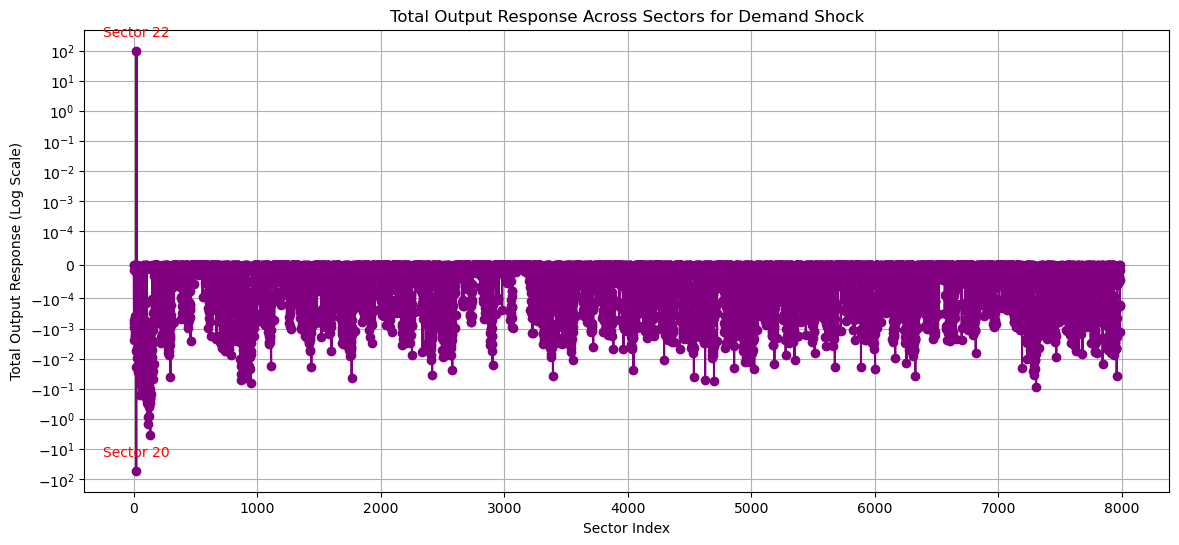

In [43]:
# Plot all sector responses without filtering
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(total_output_response)), total_output_response, marker='o', color='purple')
plt.yscale('symlog', linthresh=1e-4)  # Symmetric log scale to capture small variations
plt.title('Total Output Response Across Sectors for Demand Shock')
plt.xlabel('Sector Index')
plt.ylabel('Total Output Response (Log Scale)')
plt.grid(True)

# Highlight key sectors
key_sectors = [sector_gas, sector_coal]  # Add more if needed
for sector in key_sectors:
    plt.annotate(f"Sector {sector}", (sector, total_output_response[sector]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.show()

#### Step 3: Simulating the reverse demand shock scenario `(↓ gas, ↑ coal)`

In [44]:
# Setting up the reverse scenario
# Reverse the gas and coal adjustments from the previous scenario
sector_gas = 22  # Index for the gas sector
sector_coal = 20  # Index for the coal sector

# Define reverse shock values (opposite to the original shock)
gas_decrease = -100  # Decrease demand for gas by 100 units
coal_increase = 50   # Increase demand for coal by 50 units

# Initialize the reverse demand shock vector with zeros
reverse_demand_shock = np.zeros(matrix_2015_A_cleaned.shape[0])

# Apply the reverse demand shock: decrease demand for gas, increase demand for coal
reverse_demand_shock[sector_gas] = gas_decrease
reverse_demand_shock[sector_coal] = coal_increase

# Display the reverse demand shock vector
print("Reverse Demand Shock Vector (Gas Decrease, Coal Increase):")
print(reverse_demand_shock)

Reverse Demand Shock Vector (Gas Decrease, Coal Increase):
[0. 0. 0. ... 0. 0. 0.]



Total Output Response for Reverse Demand Shock:
[0.00000000e+00 8.94990766e-04 2.34586002e-03 ... 1.62955613e-04
 4.57809438e-05 0.00000000e+00]


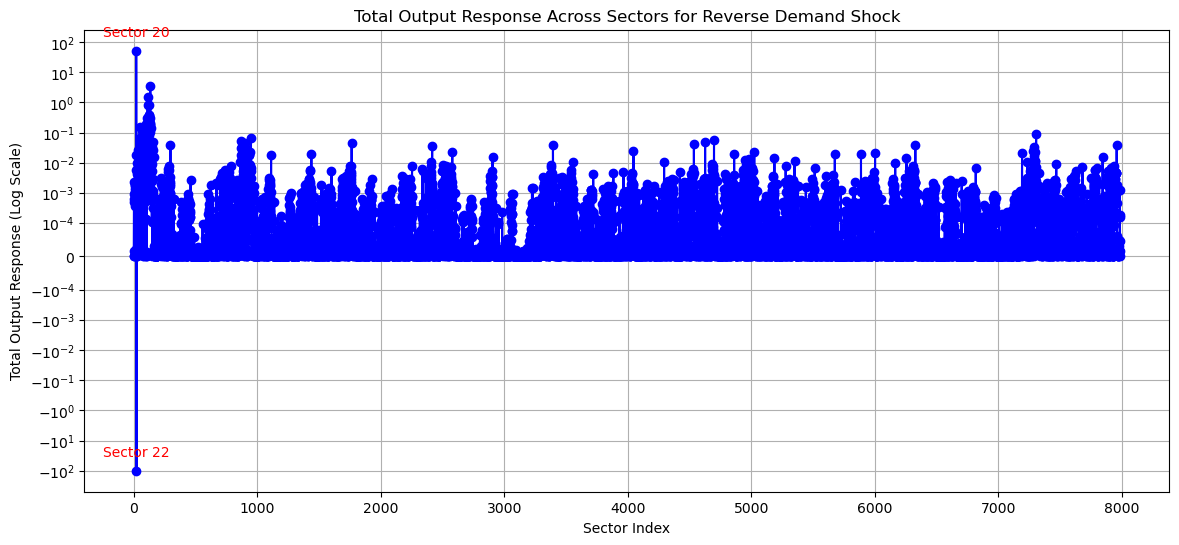

In [45]:
# Quantifying & visualizing the demand shock in the reverse scenario 
# Calculate the impact of the reverse demand shock
reverse_total_output_response = L @ reverse_demand_shock

# Display the calculated total output response for the reverse scenario
print("\nTotal Output Response for Reverse Demand Shock:")
print(reverse_total_output_response)

# Visualize the impact of the reverse demand shock
plt.figure(figsize=(14, 6))
plt.plot(
    np.arange(len(reverse_total_output_response)),
    reverse_total_output_response,
    marker='o',
    color='blue'
)
plt.yscale('symlog', linthresh=1e-4)  # Symmetric log scale for capturing small variations
plt.title('Total Output Response Across Sectors for Reverse Demand Shock')
plt.xlabel('Sector Index')
plt.ylabel('Total Output Response (Log Scale)')
plt.grid(True)

# Highlight the key sectors for the reverse scenario
reverse_key_sectors = [sector_gas, sector_coal]  # Add any additional sectors as needed
for sector in reverse_key_sectors:
    plt.annotate(
        f"Sector {sector}",
        (sector, reverse_total_output_response[sector]),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        color='red'
    )
plt.show()

To wrap up our analysis, we compare the **baseline output** - the total output required to meet demand without any demand shock - with the output after applying the simulated demand shock. This baseline serves as a reference point, allowing us to see the relative impact of the demand shock on each sector. 

By calculating the **output change** (the difference between the baseline and post-shock output), we can assess how each sector is affected by the adjusted demand. To ensure clarity, we filter out **negligible changes** (values below 1e-4), focusing only on sectors with significant shifts in output. 

For a clearer interpretation, we then use a **bar plot to visualize these sectoral changes** to offer insights into how the demand shock's impact is distributed and the relative direct & indirect magnitude of effects across different parts of the economy.

In [46]:
# Calculate the baseline total output without any demand shock
baseline_output = L @ np.zeros(matrix_2015_A_cleaned.shape[0])

In [48]:
# Calculate the relative change in output due to the demand shock
output_change = total_output_response - baseline_output

# Display results for significant changes in output only
# Filter out negligible changes (values below 1e-4)
significant_change = output_change[np.abs(output_change) > 1e-4] 

In [49]:
# Print the changes in output by sector (for significant changes)
print("Significant Changes in Output by Sector Due to Demand Shock:")
for i, change in enumerate(significant_change):
    print(f"Sector {i}: {change:.4f}")

Significant Changes in Output by Sector Due to Demand Shock:
Sector 0: -0.0009
Sector 1: -0.0023
Sector 2: -0.0006
Sector 3: -0.0005
Sector 4: -0.0005
Sector 5: -0.0018
Sector 6: -0.0013
Sector 7: -0.0011
Sector 8: -0.0005
Sector 9: -0.0004
Sector 10: -0.0017
Sector 11: -0.0184
Sector 12: -52.2730
Sector 13: -0.0056
Sector 14: 99.9999
Sector 15: -0.0044
Sector 16: -0.0096
Sector 17: -0.0060
Sector 18: -0.0271
Sector 19: -0.0012
Sector 20: -0.0074
Sector 21: -0.0034
Sector 22: -0.0010
Sector 23: -0.0016
Sector 24: -0.0006
Sector 25: -0.0064
Sector 26: -0.0012
Sector 27: -0.0105
Sector 28: -0.0069
Sector 29: -0.0015
Sector 30: -0.0172
Sector 31: -0.0063
Sector 32: -0.0019
Sector 33: -0.0029
Sector 34: -0.0654
Sector 35: -0.0338
Sector 36: -0.0155
Sector 37: -0.0428
Sector 38: -0.0675
Sector 39: -0.1567
Sector 40: -0.0009
Sector 41: -0.0597
Sector 42: -0.0525
Sector 43: -0.0221
Sector 44: -0.0028
Sector 45: -0.0014
Sector 46: -0.0182
Sector 47: -0.0679
Sector 48: -0.0005
Sector 49: -0.000

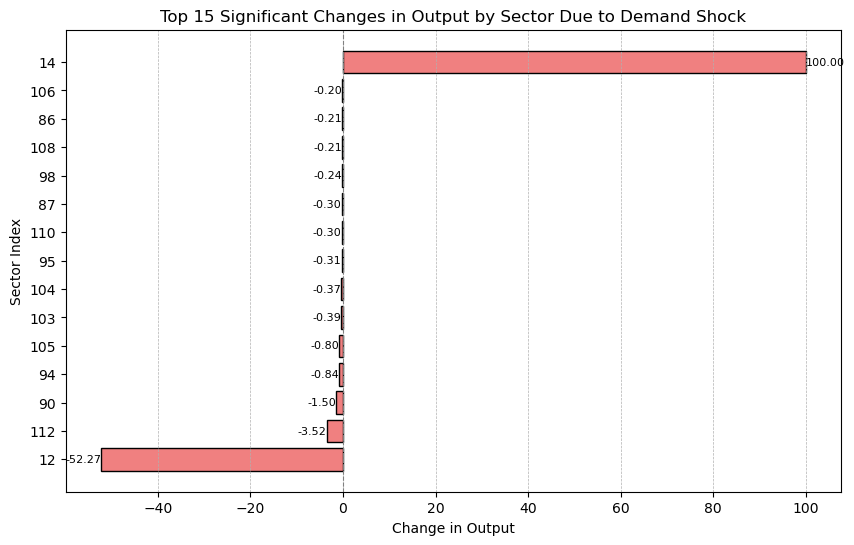

'Do not edit this code snippet'

In [50]:
# Find the top 15 sectors with the largest absolute changes
top_n = 15
top_indices = np.argsort(np.abs(significant_change))[-top_n:]
top_change = significant_change[top_indices]

# Sort the top changes for clearer visualization
sorted_top_indices = top_indices[np.argsort(top_change)]
sorted_top_change = top_change[np.argsort(top_change)]

# Plotting the top changes using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_top_change)), sorted_top_change, color='lightcoral', edgecolor='black')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # Reference line at x=0
plt.title(f'Top {top_n} Significant Changes in Output by Sector Due to Demand Shock')
plt.xlabel('Change in Output')
plt.ylabel('Sector Index')

# Adding labels for each bar to indicate the change value
for i, change in enumerate(sorted_top_change):
    plt.text(change, i, f"{change:.2f}", va='center', ha='left' if change > 0 else 'right', color='black', fontsize=8)

plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.yticks(range(len(sorted_top_change)), sorted_top_indices)  # Label each bar by sector index
plt.show()

'''Do not edit this code snippet'''

#### <font color='blue'> Complement
    
#### Discussion: Potential insights related to energy footprint analysis

While not covered in the scope of this workshop, incorporating energy footprint calculations into the Input-Output (IO) framework could offer valuable insights into sustainability and resource efficiency. Here are some potential insights that an energy footprint analysis might reveal:

> **Energy intensity**: By analyzing energy usage across sectors, we could identify which sectors are the most energy-intensive. These sectors often exhibit large multiplier effects, meaning they require substantial amounts of energy - both directly and indirectly - to meet final demand.

> **Sectoral interdependencies**: Integrating the Leontief inverse with energy-related data would expose the interdependencies among sectors. Certain industries may rely heavily on energy-intensive sectors as input suppliers, leading to a higher aggregate energy footprint across the production chain.

> **Energy mix**: Visualizing the breakdown of energy types (e.g., electricity, gas, coal) consumed by each sector could provide insights into the composition of energy sources used within industries. This breakdown would help highlight which sectors are more dependent on fossil fuels versus renewable energy, guiding energy transition strategies.

> **Target sectors for sustainability**: By identifying sectors with high energy intensity or reliance on non-renewable sources, this analysis could inform sustainability strategies. Key sectors for intervention could be highlighted, where improvements in energy efficiency or shifts to cleaner energy sources would yield the most significant environmental benefits.

### <font color='green'> 6. Concluding thoughts

####  <font color='blue'> Key takeaways, tools & techniques

**Input-Output (IO) analysis** is an economic model that tracks the flow of goods and services between industries, widely applied in **operational risk modeling** and **environmental analysis** to understand economic and ecological interdependencies across sectors. 

A key tool in this framework is **`EXIOBASE`**, a global multi-regional Input-Output table that provides comprehensive data for analyzing interactions among industries and countries. 

The **Leontief Inverse** further enhances this analysis by showing how changes in the final demand of one sector propagate across the entire economy, affecting internal demand across multiple sectors. 

Additionally, studying **demand shocks and ecological impacts** within the Input-Output framework allows us to assess how economic demand shifts influence environmental factors, such as energy consumption and emissions. By linking demand changes to ecological footprints, we gain valuable insights into sustainability, highlighting sectors where efforts to mitigate environmental impacts could be most effective.


#### <font color='blue'> Highlights per section

- **Section 1**: Introduction to IO Analysis & its criticality in terms of industry interdependency from both operational & environmental standpoints.
  
- **Section 2**: Setting up the Jupyter environment and installing the necessary Python libraries for performing the analysis.
  
- **Section 3**: Downloading and loading EXIOBASE data, to test with real-world multi-regional data & to conduct IO analysis.
  
- **Section 4**: Calculating the Leontief inverse, which helps measure the ripple effects of a change in final demand across the entire economy.
  
- **Section 5**: Simulating a demand shock in a specific sector & analyze how the shock influences total output across all other sectors.
    
---

#### Further resources (optional):

To deepen your understanding, explore these additional resources:
- [Handbook of Input-Output Economics in Industrial Ecology](https://www.springer.com/gp/book/9781402054020)
- [Global Trade Analysis Project (GTAP)](https://www.gtap.agecon.purdue.edu/)
- [Python Data Science Handbook (Online Version)](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Input-Output Economics by Wassily Leontief](https://www.oup.com/academic/product/input-output-economics-9780195035278?cc=us&lang=en&)
- [Python for Data Analysis: Environmental Impact and Risk Modeling](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
- [Article: Use Input-Output Model to Assess Economic Impact](https://medium.com/geekculture/use-input-output-model-to-assess-economic-impact-352f141dc214)

---
For further reading, refer to Blair and Miller’s book on [Input-Output Analysis](https://www.cambridge.org/core/books/inputoutput-analysis/69827DA658E766CD1E17B1A47BA2B9C3).With this theory in mind, we will proceed with practical implementation.

<img src="https://m.media-amazon.com/images/I/61TUp8GbMkL._AC_UF1000,1000_QL80_.jpg" width="150"/>



<div align="center" style="font-size:12px;">
Blair, P. D., & Miller, R. E. (2009). <i>Input-output analysis: Foundations and extensions</i> (2nd ed.). Cambridge University Press.
</div>